# Принятие решений в бизнесе


**Цель исследования** - приоритезировать гипотезы, запустить A/B-тест, проанализировать его результаты.

Результатами исследования станут:
* определение наиболее перспективной гипотезы улучшения бизнес-метрик, внедрение изменений согласно этой гипотезы и проведение А/В-теста.
* определение эффекта от внедрения этих изменений: анализ результатов А/В теста.

## Приоритезация гипотез

В первой части проекта приоритезируем гипотезы, это необходимо для того чтобы выбрать наиболее перспективную идею и сократить расходы на эскперименты, т.е. избежать проверки наименее перспективных идей.

Импортируем библиотеки необходимые нам в решении задач исследования.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

Ознакомимся с данными:

In [2]:
data = pd.read_csv('hypothesis.csv')
pd.options.display.max_colwidth = 150

data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Согласно документации к данным структура `hypothesis`:
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


In [3]:
#приведем столбцы датасета к нижнему регистру для удобстава исследования

data.columns = data.columns.str.lower()

### Фреймворк ICE для приоритизации гипотез

Дадим разъяснение понятия:

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») 

Фреймворк ICE состоит из трех компонент:
* Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
* Efforts — сколько стоит протестировать эту гипотезу. 

In [4]:
data['ICE'] = round(data['impact'] * data['confidence'] / data['efforts'], 2)

display(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:**

Восьмая гипотеза - самая перспективная. Затем идут гипотезы 0, 7, 6.

### Фреймворк RICE для приоритизации гипотез

Дадим разъяснение понятия:

Фреймворк RICE состоит из четырёх компонент:
* Reach — скольких пользователей затронет изменение, которое вы хотите внести;
* Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
* Efforts — сколько стоит протестировать эту гипотезу.  

In [5]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts'] 
display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:**
В этом случае наиболее перспективные гипотезы 7, 2, 0, 6.

### Вывод

Поясним чем отличаются фреймворки `ICE` и `RICE` между собой - основное отличие заключается в том, что фреймворк `RICE` предполагает ещё и оценку охвата, т.е. предполагаемого количества пользователей, которых затронет вносимое изменение.
    
Согласно методу `ICE` лидером по перспективности является гипотеза 8, вместе с тем эта гипотеза даже не вошла в первую 4-ку перспективных гипотез по методу `RICE`. Это связано с тем что ее парметр Reach (охват пользователей) равен 1, в то время как у других гипотез он выше.

Также 3 гипотезы: 0, 6, 7 показали высокие результаты и вошли в 4-ки лидеров по обоим методам приоритезации; значения их параметров Reach оказались достаточными для сохранения их лидерских позиций при добавлении этого парметра в расчет.

Гипотеза 2 показала хорошие результаты при оценке ее перспективности по методу `RICE`, при этом она не была отмечена в 4-ке лидеров при оценке по методу `ICE`, так получилось, потому что ее параметр Reach равен 8 (что является высоким показателем при 10-бальной оценке) и при этом параметр Efforts (стоимости тестирования гипотезы) равен 3, в то время как у других гипотез он выше.

## Анализ А/В-теста

### Обзор и предобработка данных

Выгрузим датасеты в переменные, посмотрим что они из себя представляют и исследуем информацию о содержащихся в датасетах данных.

In [6]:
visitors, orders = (
    pd.read_csv('visitors.csv'),  # пользователи
    pd.read_csv('orders.csv'),  # заказы
)

In [7]:
display(visitors.head(), visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


None

Согласно документации к данным структура `visitors`:

* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

In [8]:
display(orders.head(), orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


None

Согласно документации к данным структура `orders`:
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

По первому взгляду на датасеты можно сделать следующие **выводы:**
* типы данных не соответствуют сохраненным в них значениям: столбцы с датами определены как тип данных `object`
* наименования стобцов требуют предобработки: приведения к единому стилю написания (нижний регистр, змеиный язык), для удобства дальнейшей работы с ними.

In [9]:
#приведение названий столбцов к нижнему регистру
orders.columns = orders.columns.str.lower()

#переименование столбцов
orders = orders.rename(columns = {'transactionid':'transaction_id', 'visitorid':'visitor_id'}) 

#преобразование данных о времени
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [10]:
#проверка названий столбцов
display(orders.head())

#проверка типов данных
display(visitors.info())
orders.info()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [11]:
#проверим датасеты на наличие пропущенных значений
display(visitors.isna().sum())
orders.isna().sum()

date        0
group       0
visitors    0
dtype: int64

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Пропущенных значений нет.

In [12]:
#проверим датасеты на наличие явных дубликатов
display(visitors.duplicated().sum())
orders.duplicated().sum()

0

0

Явных дубликатов нет.

Определим некоторые справочные данные по исследуемому эксперименту:
* количество групп А/В-теста
* количество пользователей в каждой группе
* даты проведения теста

In [13]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


group
A    503
B    586
Name: visitor_id, dtype: int64

'Начало проведения А/В теста'

Timestamp('2019-08-01 00:00:00')

'Окончание проведения А/В теста'

Timestamp('2019-08-31 00:00:00')

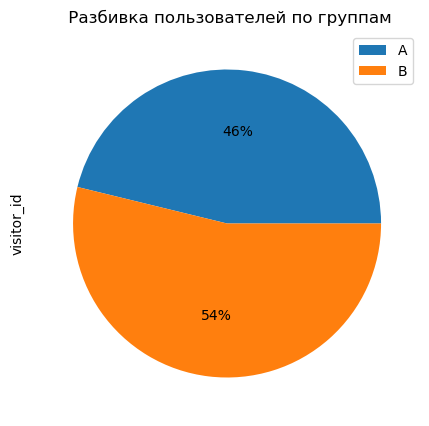

In [14]:
#количество групп и пользователей в каждой из них

orders.groupby('group')['visitor_id'].agg('nunique').plot(kind='pie',
                                                          figsize= (5, 5),
                                                          title= ' Разбивка пользователей по группам', 
                                                          legend=True, 
                                                          labels=None, 
                                                          autopct='%1.0f%%')

display(orders.groupby('group')['visitor_id'].agg('nunique'))

#временные рамки проведения теста
display('Начало проведения А/В теста', orders['date'].min())
display('Окончание проведения А/В теста', orders['date'].max())


Опираясь на данные можно сделать следующие **выводы:**
* А/В тест - парный, т.к. количество групп в эксперименте две: А и В
* Продолжительность теста 1 месяц c 1 августа 2019 года до 31 августа 2019 года
* Заказы по группам распределились следующим образом: 46% (503 заказа) в группе А и 54% (586 заказов) в группе В, в целом значения одного порядка, различаются в 8%, можно сделать вывод что группы, участвующие в тестировании, сбалансированы по числу пользователей.

Также проверим наличие технических ошибок в распределяющей системе теста, т.е. проверим наличие пользователей, участвовавших в нескольких группах теста одновременно:

In [15]:
#находим количество уникальных групп для каждого пользователя 
#фильтруем пользователей с более чем 1 группой
bug_visitors = orders.pivot_table(
    index = 'visitor_id', 
    values = 'group', 
    aggfunc = 'nunique').query('group > 1')

display(bug_visitors.head())

display('Количество пользователей с ошибками:', bug_visitors.shape[0])
display('Доля пользователей с ошибками (%):', 
        round(bug_visitors.shape[0] / orders['visitor_id'].nunique() * 100, 2))

,group
visitor_id,
8300375,2
199603092,2
232979603,2
237748145,2
276558944,2


'Количество пользователей с ошибками:'

58

'Доля пользователей с ошибками (%):'

5.63

**Выводы:**

По результатам проверки обнаружены технические ошибки распределеяющей системы: 58 пользователей (около 6% от их общего числа) ошибочно стали участниками и А и В групп. Стоит сообщить об этой проблеме разработчикам теста, чтобы они учли ошибки на будущие тесты.

В нашем случае примем решение не удалять данные этих пользователей т.к. их количество небольшое и нельзя корректно удалить этих пользователей из датасета `visitors` потому что данные в нем агрегированны.

### Кумулятивный средней чек по группам

Построим график кумулятивного среднего чека по группам A/B-тестирования, для начала соберем необходимые кумулятивные данные:

In [16]:
#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

#получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {'date' : 'max', 
         'group' : 'max', 
         'transaction_id' : 'nunique', 
         'visitor_id' : 'nunique', 
         'revenue' : 'sum'}
    ), axis=1).sort_values(by=['date','group'])

#получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {'date' : 'max', 
         'group' : 'max', 
         'visitors' : 'sum'}
    ), axis=1).sort_values(by=['date','group'])

#объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

#присваиваем ее столбцам понятные названия
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Теперь по собранным данным построим графики кумулятивной выручки по дням и группам A/B-тестирования:

In [17]:
#улучшим четкость изображения графиков
%config InlineBackend.figure_format = 'retina'

In [18]:
#оптимизируем размеры графиков
plt.rcParams["figure.figsize"] = (10, 7.5)

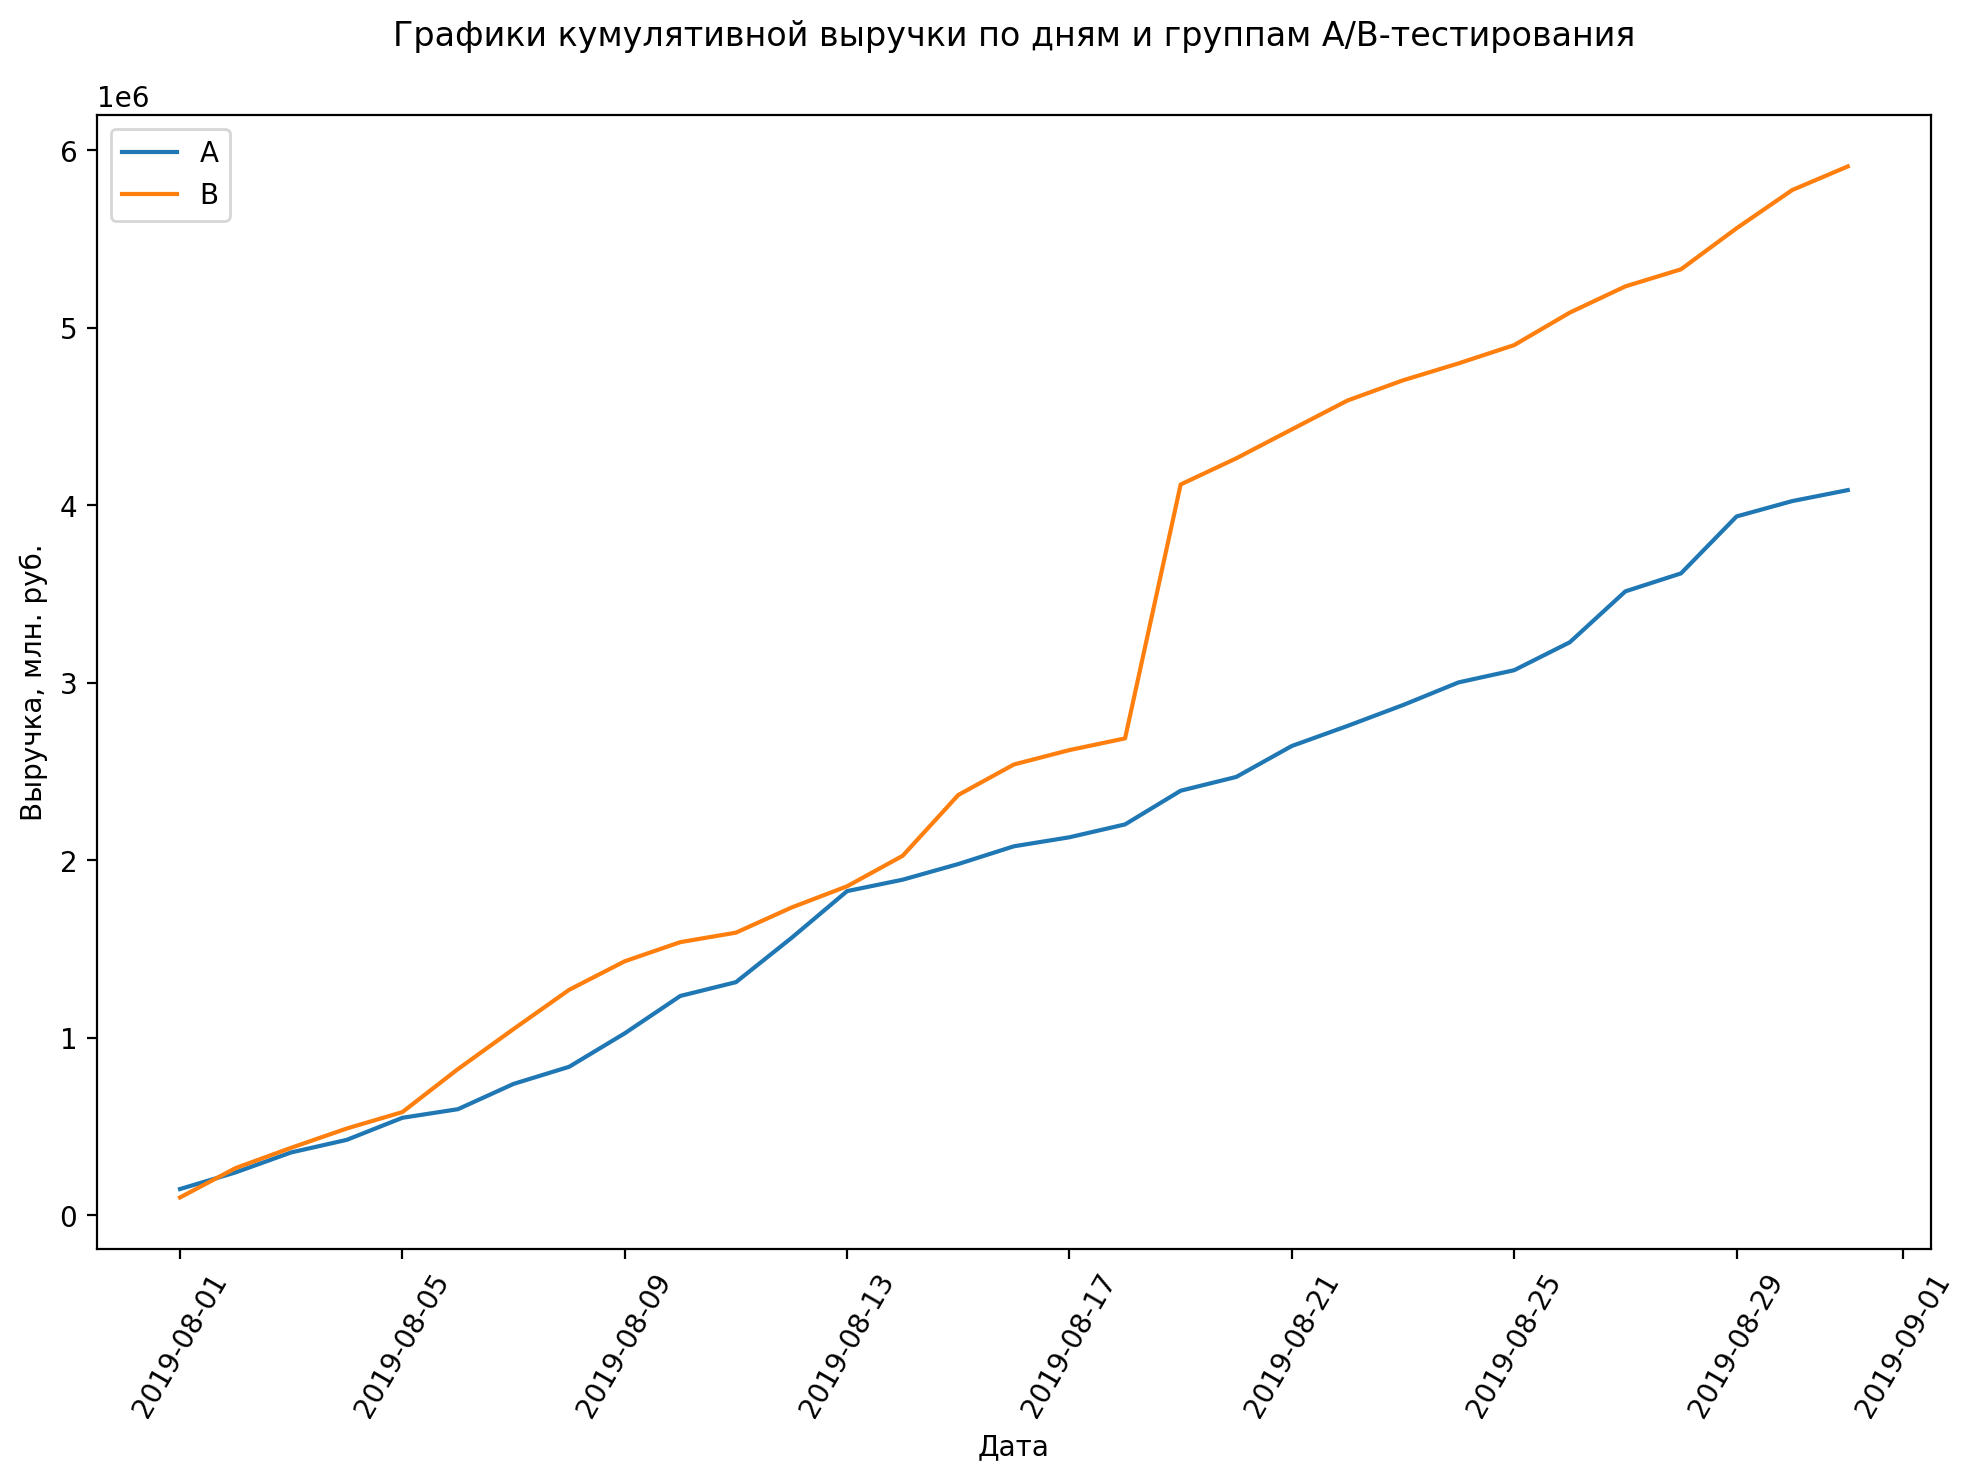

In [19]:
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

#строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.ylabel('Выручка, млн. руб.')
plt.xlabel('Дата')
plt.xticks(rotation = 60)
plt.title('Графики кумулятивной выручки по дням и группам A/B-тестирования', pad=25)
plt.legend()
plt.tight_layout()

**Вывод:** 

Выручка обеих групп почти равномерно увеличивается в течение всего теста. При этом сегмент B показывает лучшие результаты, а результаты сегмента А ровнее и стабильнее, в середине эксперимента у сегмента В наблюдается резкий скачок, это может быть связано с аномалиями: либо большим числом заказов, либо с большой суммой чека.

Посмотрим как менялся средний чек у каждой группы на протяжение теста, для этого построим графики кумулятивного среднего чека по дням — разделим кумулятивную выручку на кумулятивное число заказов.

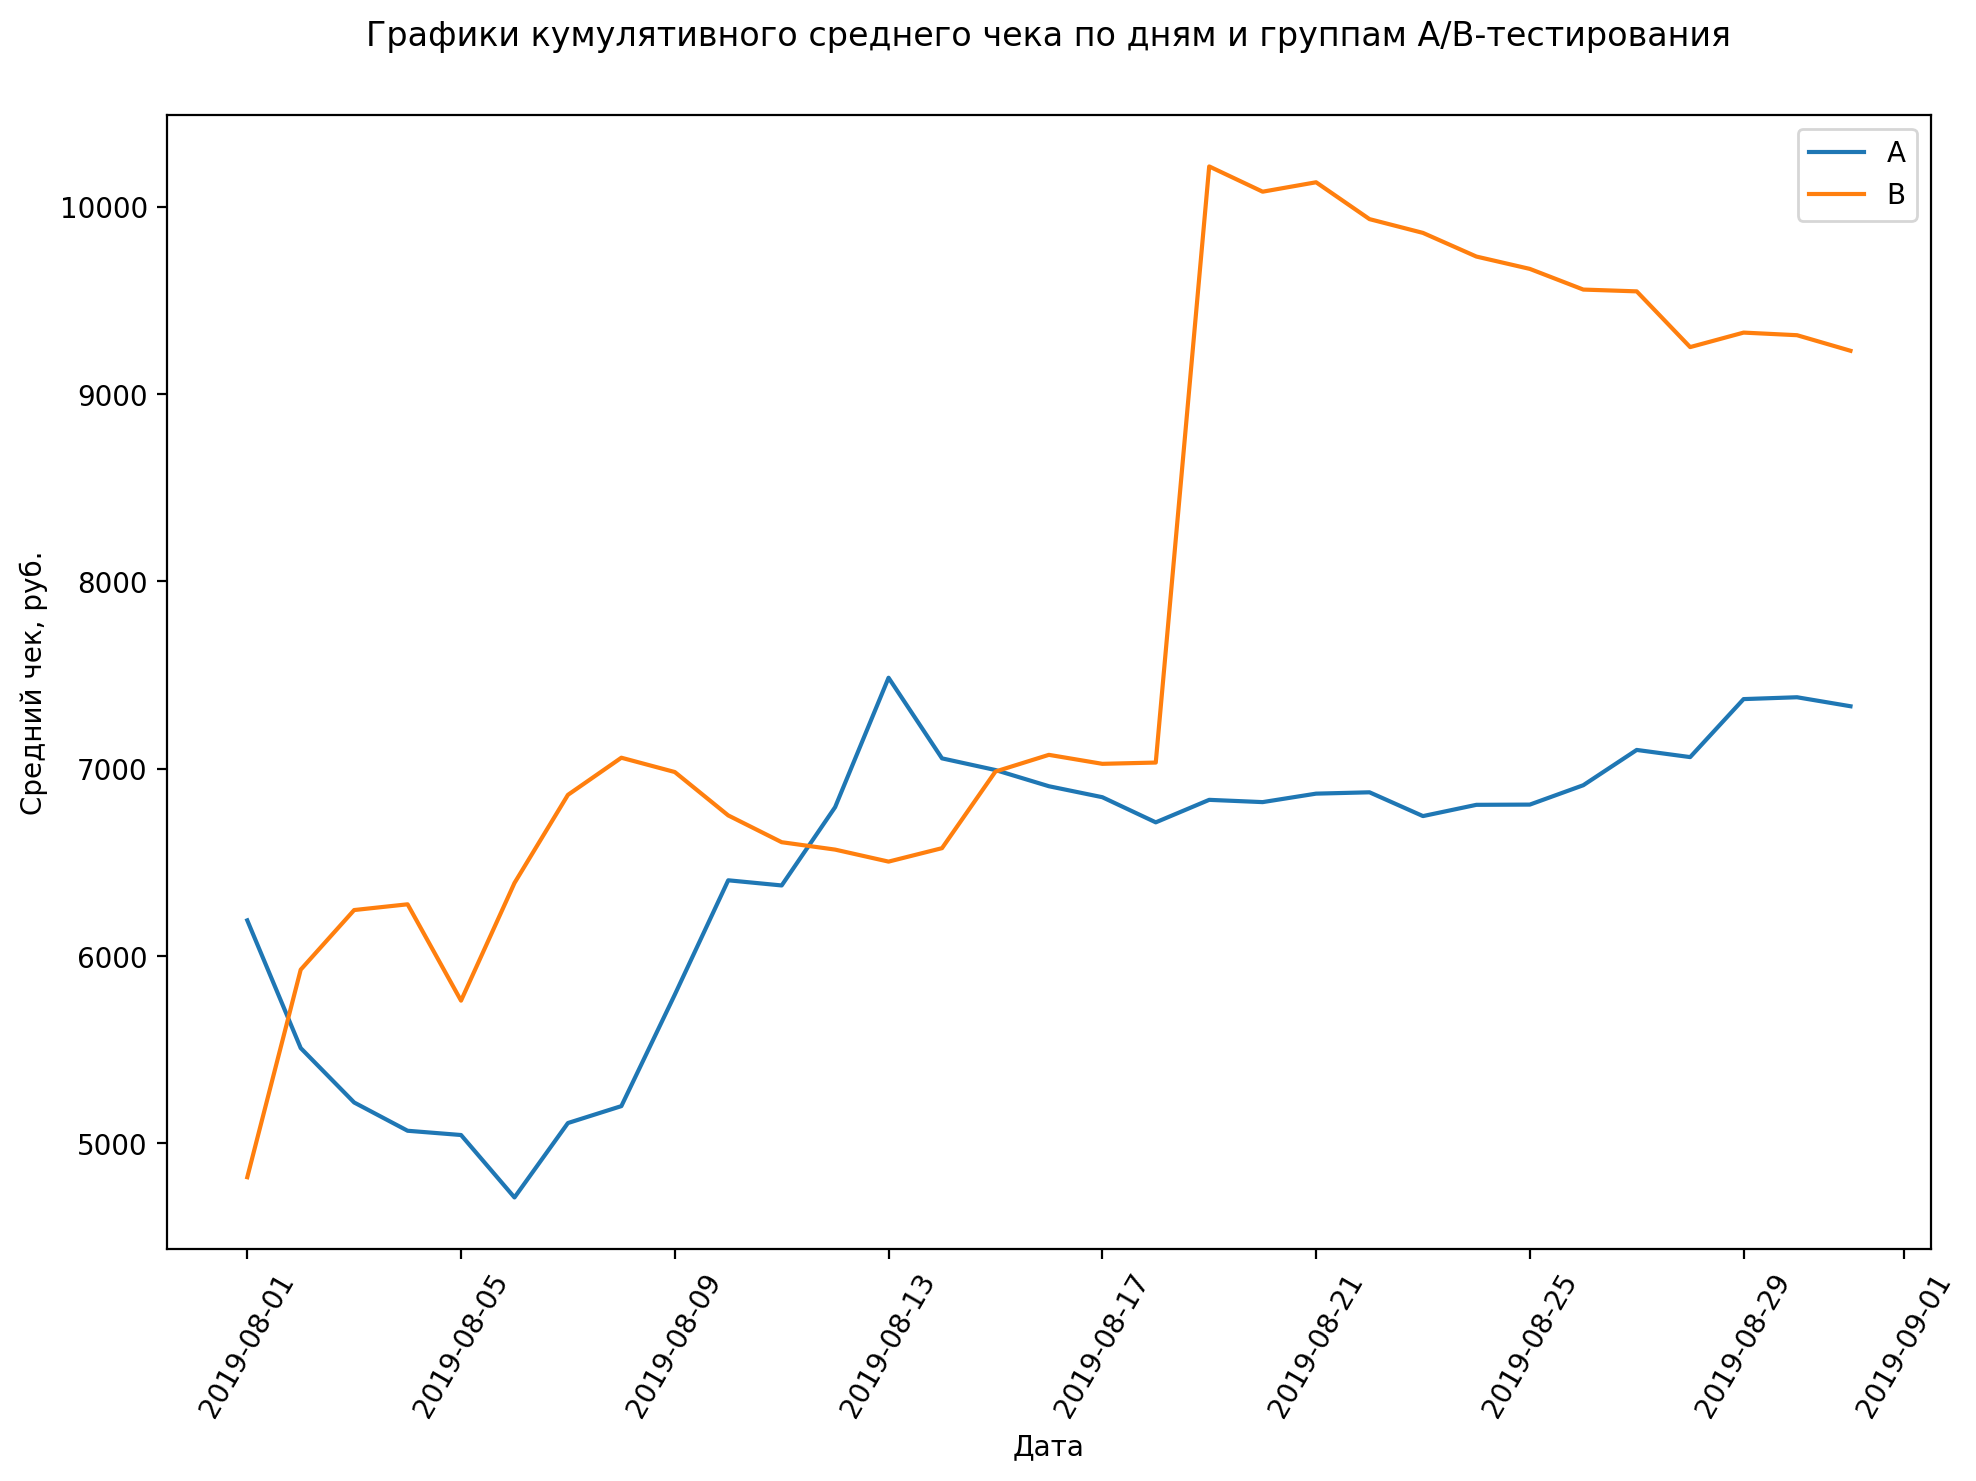

In [20]:
#строим график
plt.plot(
    cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A'
)
plt.plot(
    cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B'
)

plt.ylabel('Средний чек, руб.')
plt.xlabel('Дата')
plt.xticks(rotation = 60)
plt.title('Графики кумулятивного среднего чека по дням и группам A/B-тестирования', pad=25)
plt.legend()
plt.tight_layout()

**Вывод:** 

Средний чек сегмента А становится равномерным ближе к концу теста. Для сегмента В средний чек еще не установился, падает во второй половине теста, после резкого скачка в середине теста. Необходимо провести дополнительный анализ выбросов, которые влияют на результаты.


### Относительные изменения кумулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

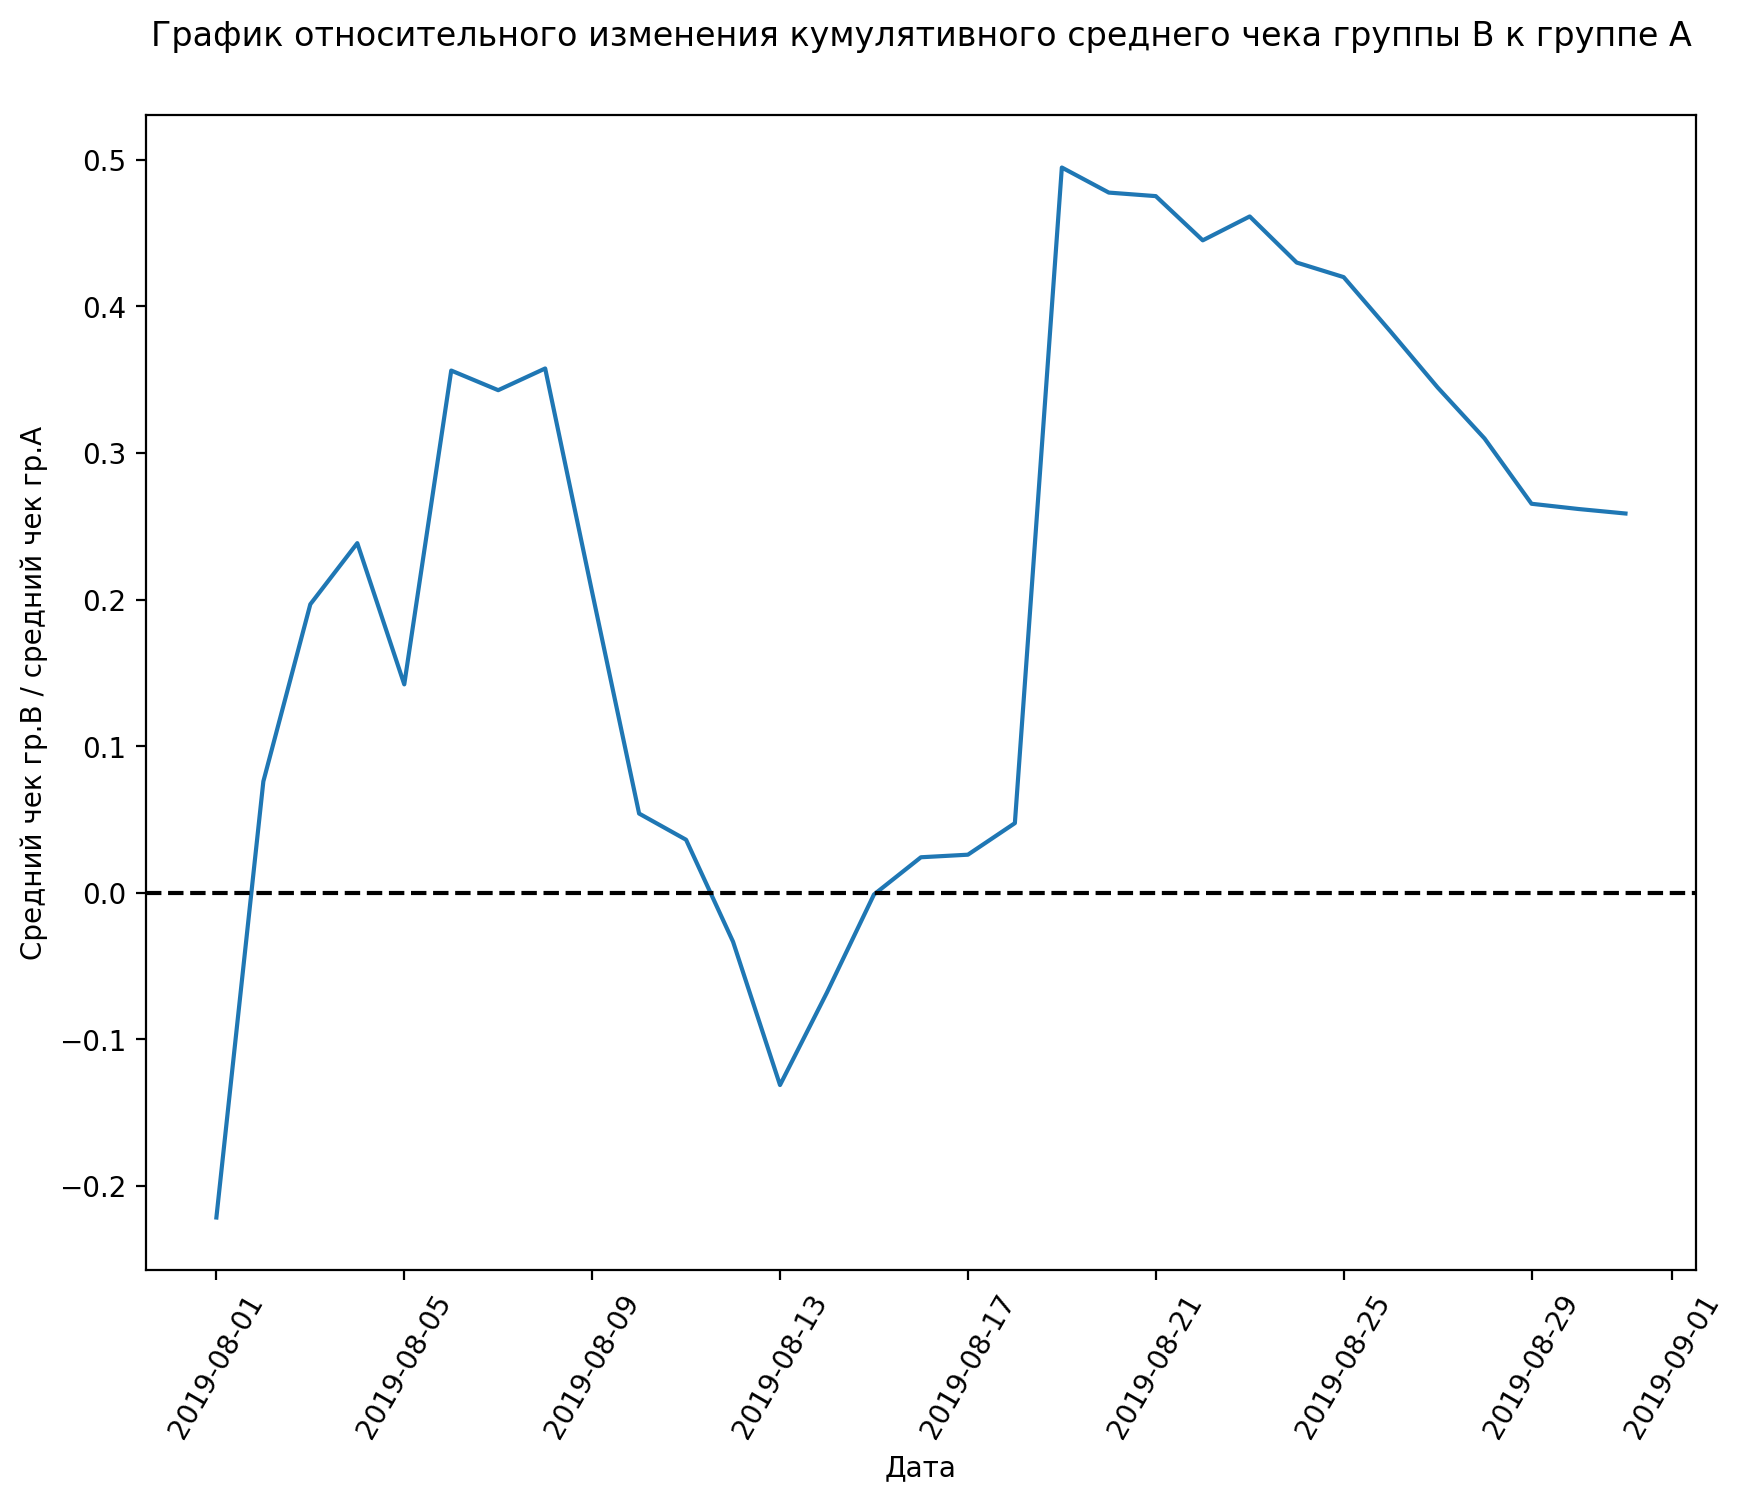

In [21]:
#собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#cтроим отношение средних чеков
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']
    )/(
        mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)

#добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.ylabel('Cредний чек гр.B / средний чек гр.А')
plt.xlabel('Дата')
plt.xticks(rotation = 60)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', pad=25);

**Вывод:**

В нескольких точках график различия между сегментами резко менялись, возможно именно в эти даты и были сдовершены аномальные заказы.

### Кумулятивное среднее количество заказов на посетителя по группам

Аналогично проанализируем график кумулятивного среднего количество заказов на посетителя по группам.

In [22]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [23]:
#определим минимальную и максимальную даты проведения теста
display(cumulativeData['date'].min())
cumulativeData['date'].max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

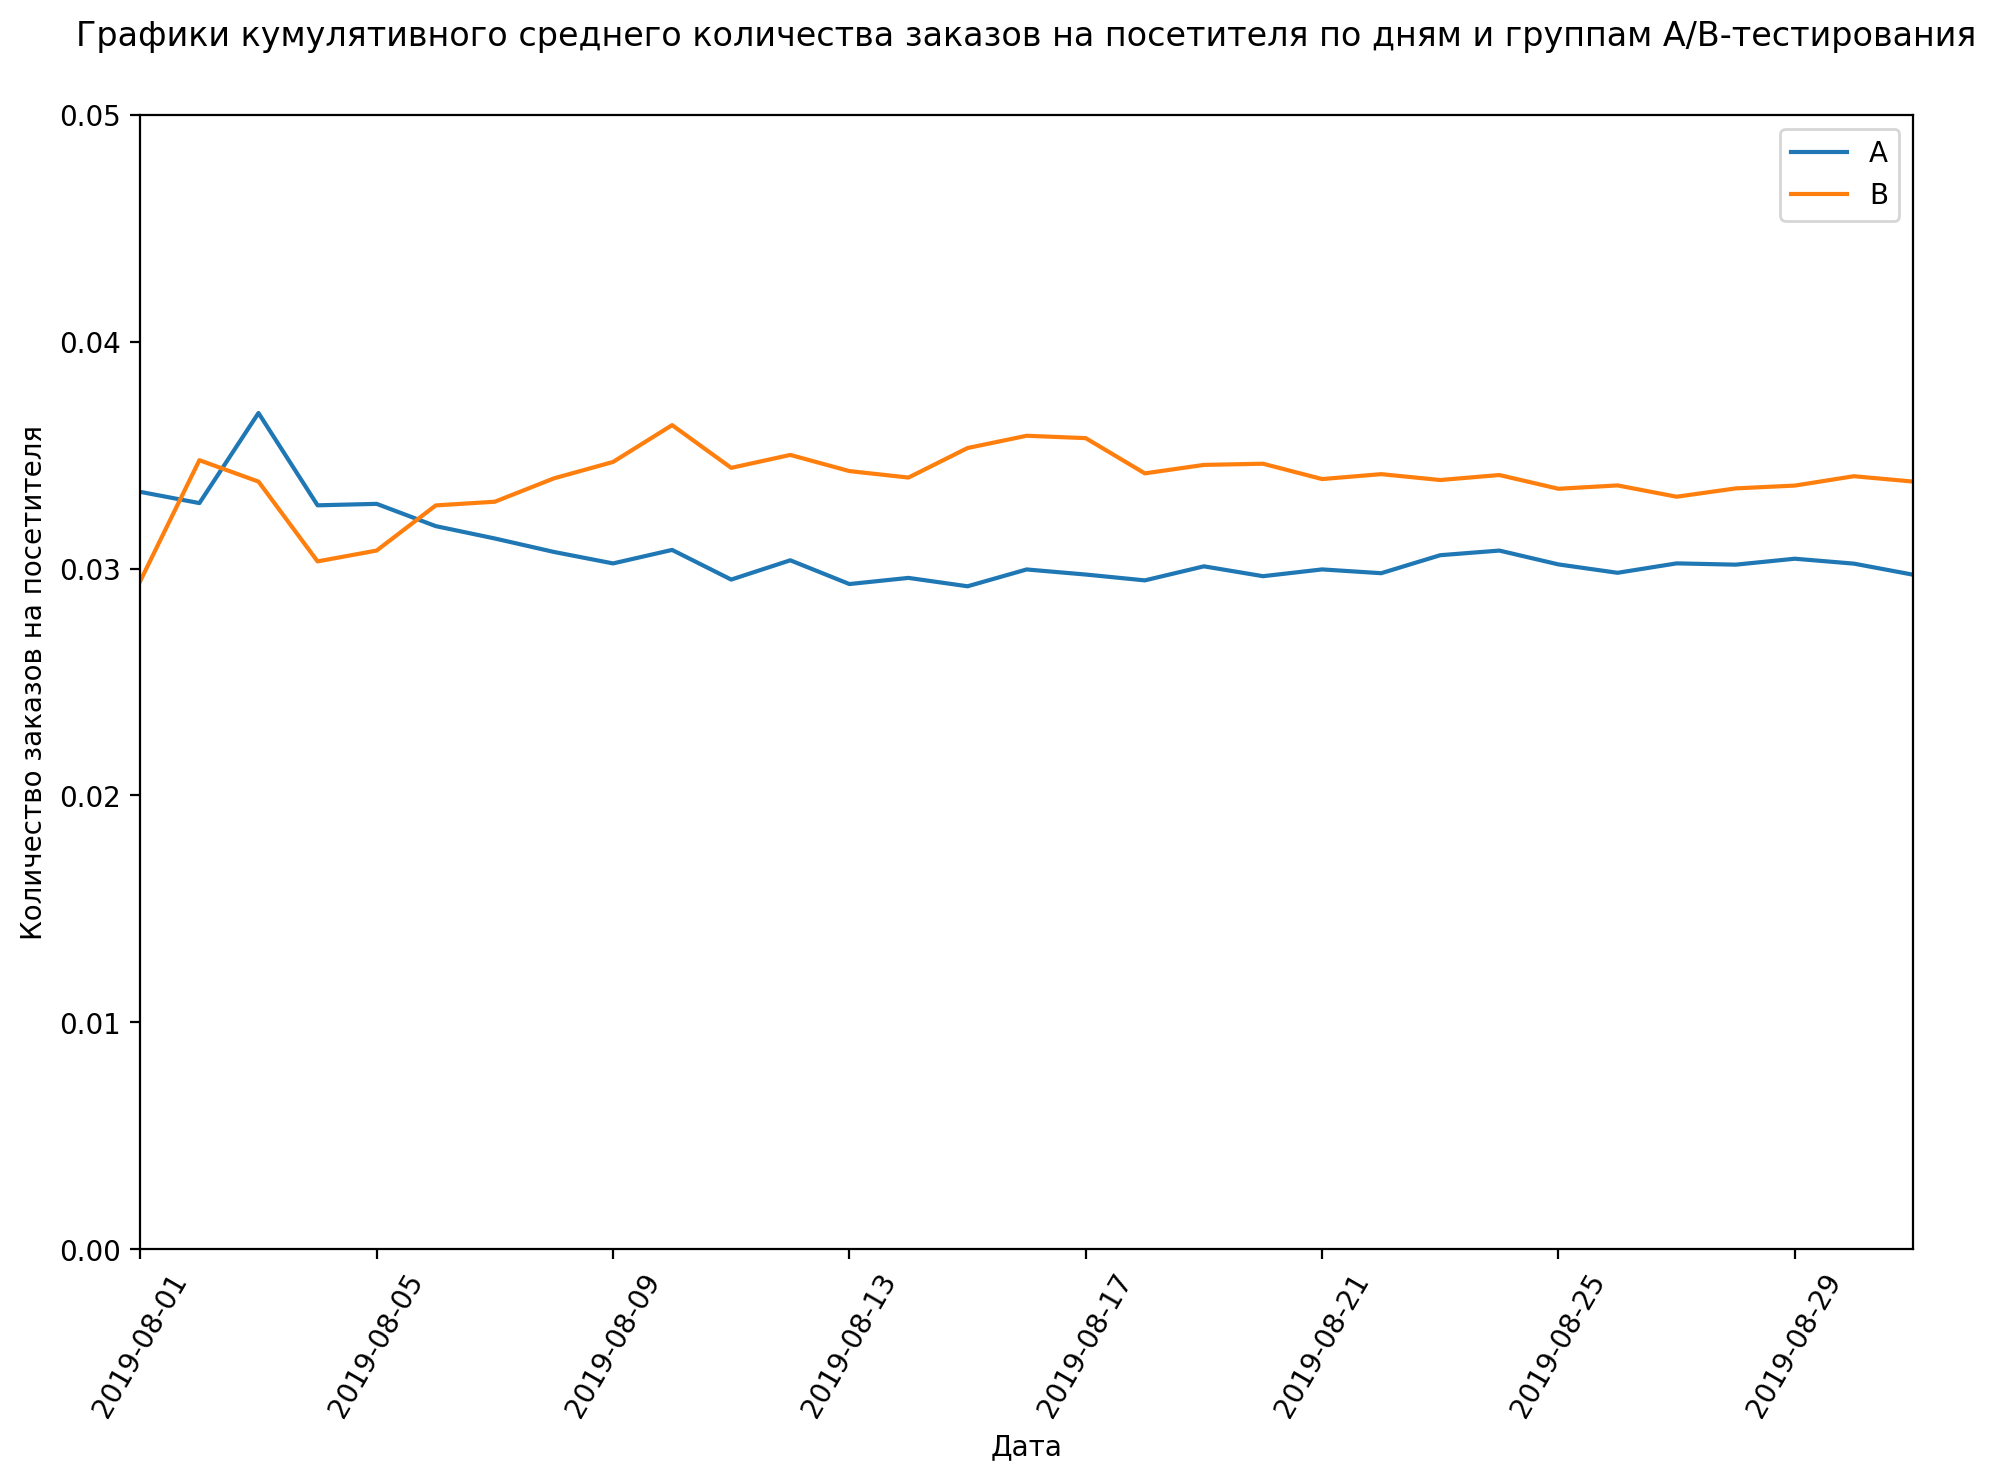

In [24]:
#считаем кумулятивное среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

#отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.ylabel('Количество заказов на посетителя')
plt.xlabel('Дата')
plt.xticks(rotation = 60)
plt.title(
    'Графики кумулятивного среднего количества заказов на посетителя по дням и группам A/B-тестирования', 
    pad=25
)
plt.legend()
plt.tight_layout()

#задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05]);

**Вывод:**

В начале теста сегмент А имел лучшие показатели среднего количества заказов на посетителей, но со временем сегмент В выровнялся и зафиксировался примерно около одного значения, больше значения сегмента А.

### Относительное изменение кумулятивного среднее количества заказов на посетителя группы B к группе A

Построим график относительного различия кумулятивного среднего количества заказов на посетителя группы B к группе A.

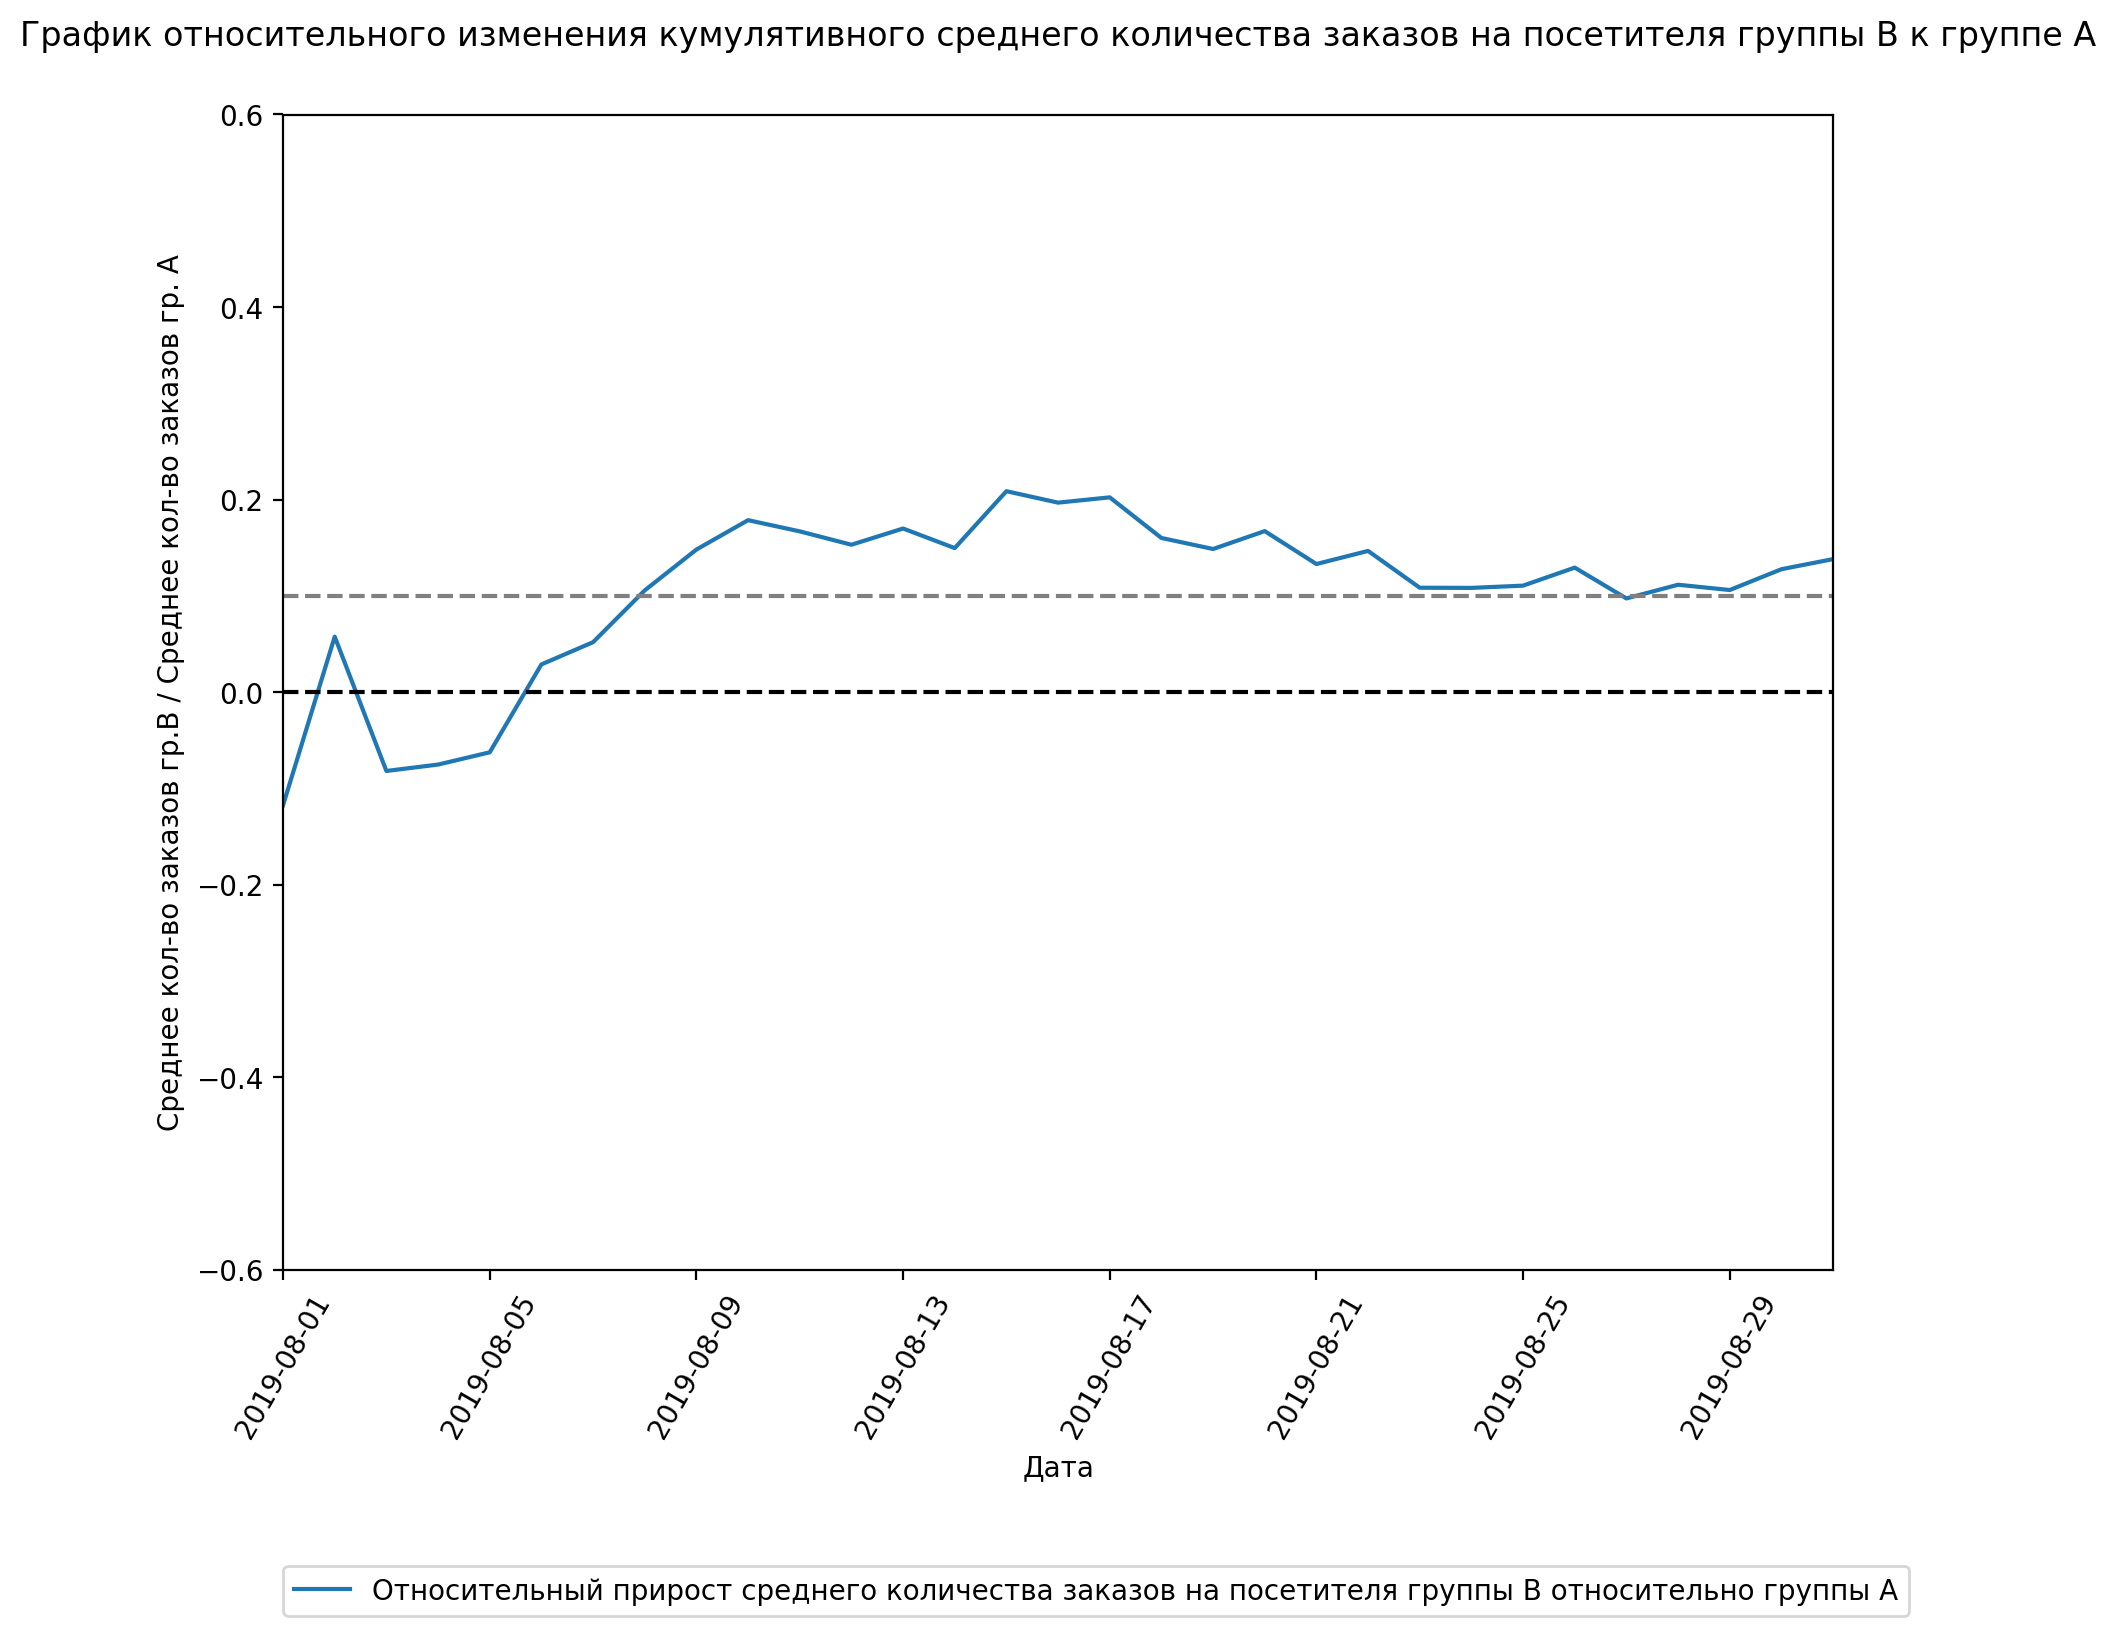

In [25]:
#объединяем данные о количестве заказов групп А/В в одной таблице
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

#строим графики
plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
    label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A"
)

plt.ylabel('Среднее кол-во заказов гр.В / Среднее кол-во заказов гр. А')
plt.xlabel('Дата')
plt.xticks(rotation = 60)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', pad=25)
plt.legend(ncol = 3, bbox_to_anchor=(0, -0.3), loc='lower left', borderaxespad=0)

#добавляем вспомогательные линии
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6]);

**Вывод:** 

В начале теста сегмент B проигрывал сегменту A, затем вырвался вперёд. После его кумулятивное среднее количество заказов на посетителя падало, но со временем зафиксировалось около прироста в 10% относительно сегмента А.

### Анализ аномальных значений

#### Построим точечный график количества заказов по пользователям и оценим количество заказов.


In [26]:
#соберем данные для построения графика
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id' : 'nunique'})
)

#присваиваем столбцам понятные названия
ordersByUsers.columns = ['visitor_id', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


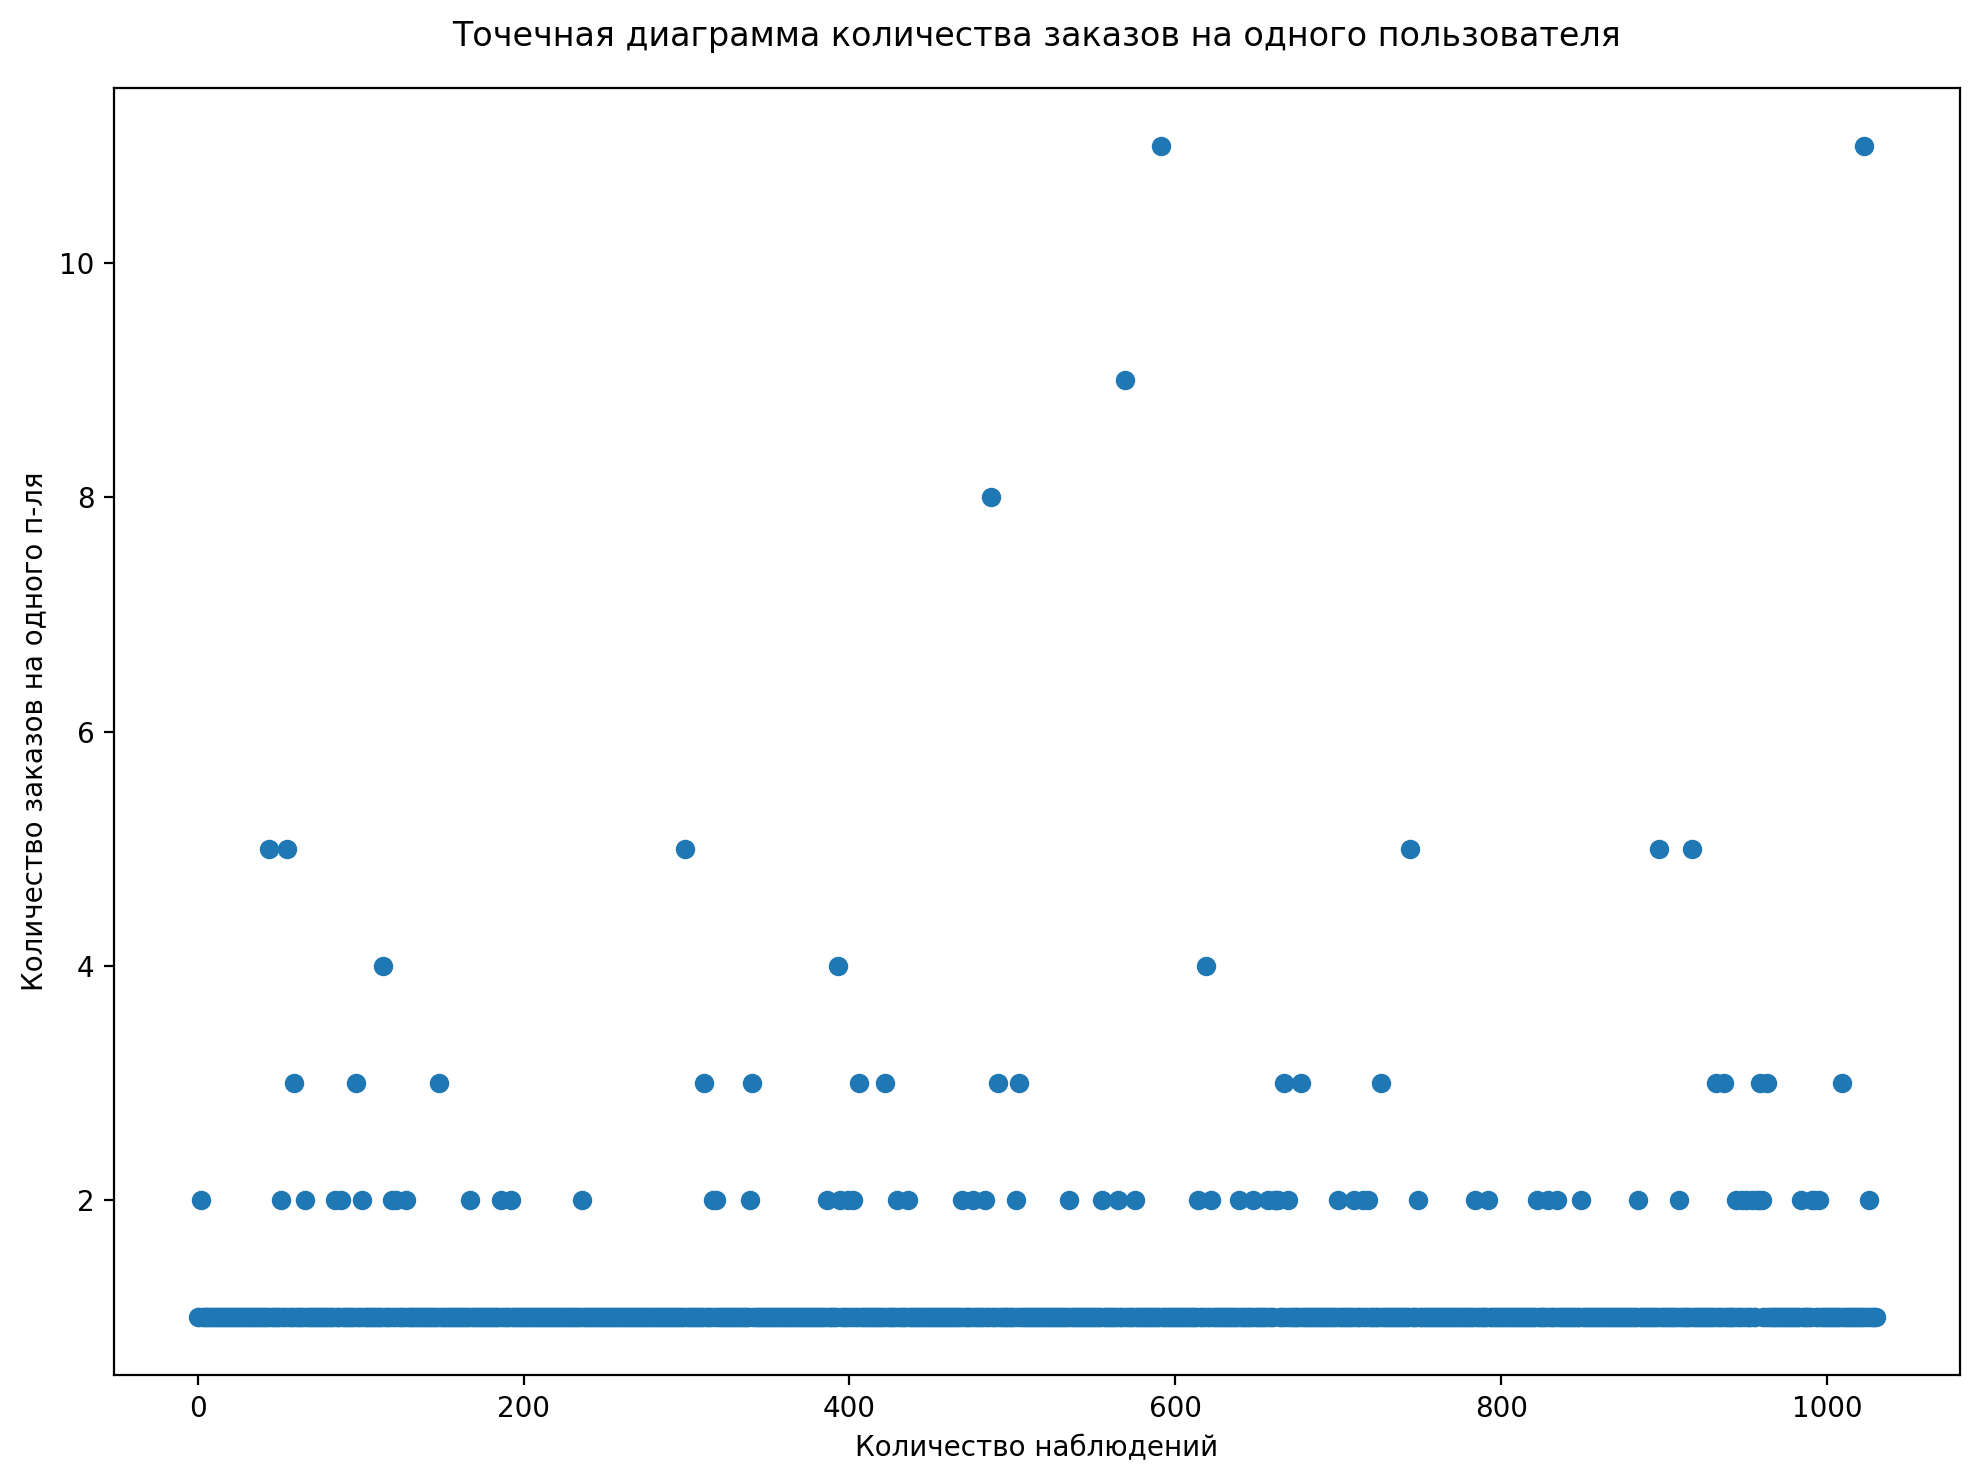

In [27]:
#построим точечную диаграмму

#серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.ylabel('Количество заказов на одного п-ля')
plt.xlabel('Количество наблюдений')
plt.title('Точечная диаграмма количества заказов на одного пользователя', pad=15)
plt.tight_layout();

**Вывод:**

Пользователей, совершивших заказ более 2 раз, значительно меньше чем пользователей с 1-2 заказами.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 

In [28]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

**Вывод:**

Не более 1% пользователей совершали заказ более 4-х раз и не более 5% пользователей - более 2-х раз.

Разумно выбрать 4 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

#### Построим точечный график стоимостей заказов.

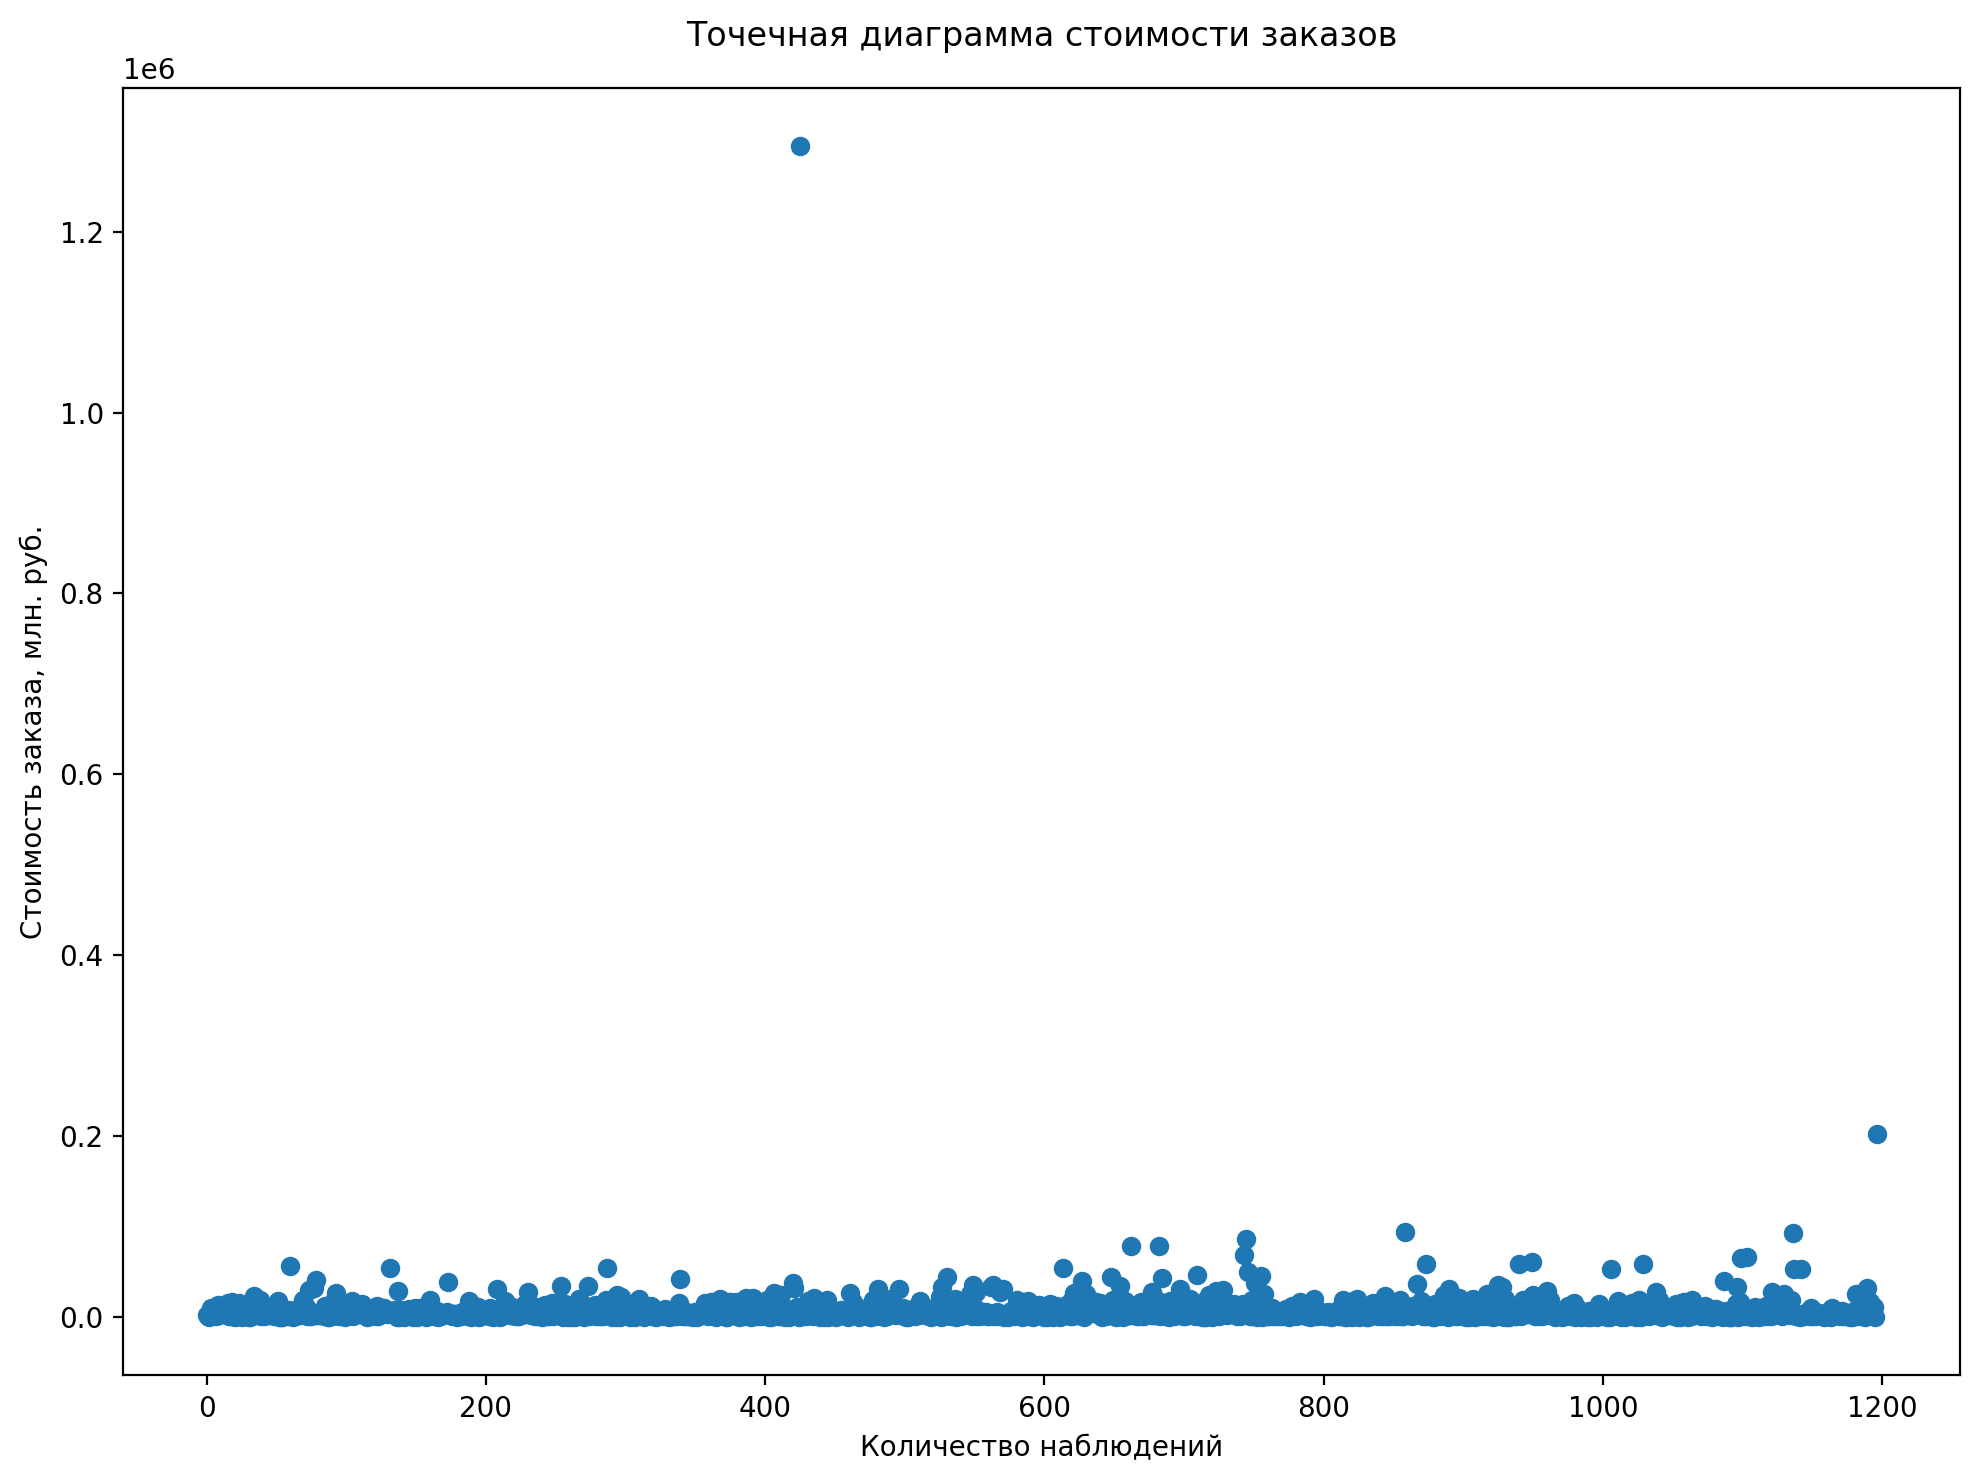

In [29]:
#построим точечную диаграмму

#серия из чисел от 0 до количества наблюдений
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])

plt.ylabel('Стоимость заказа, млн. руб.')
plt.xlabel('Количество наблюдений')
plt.title('Точечная диаграмма стоимости заказов', pad=15)
plt.tight_layout();

**Вывод:**

На графике видно, что большинство заказов имеет меньшую выручку, тогда как дорогих заказов совсем немного.

По графику можно выбрать границу аномальных заказов между 50 000 и 100 000 рублей. Проверим наше предположение расчетом перцентилей стоимости заказов.

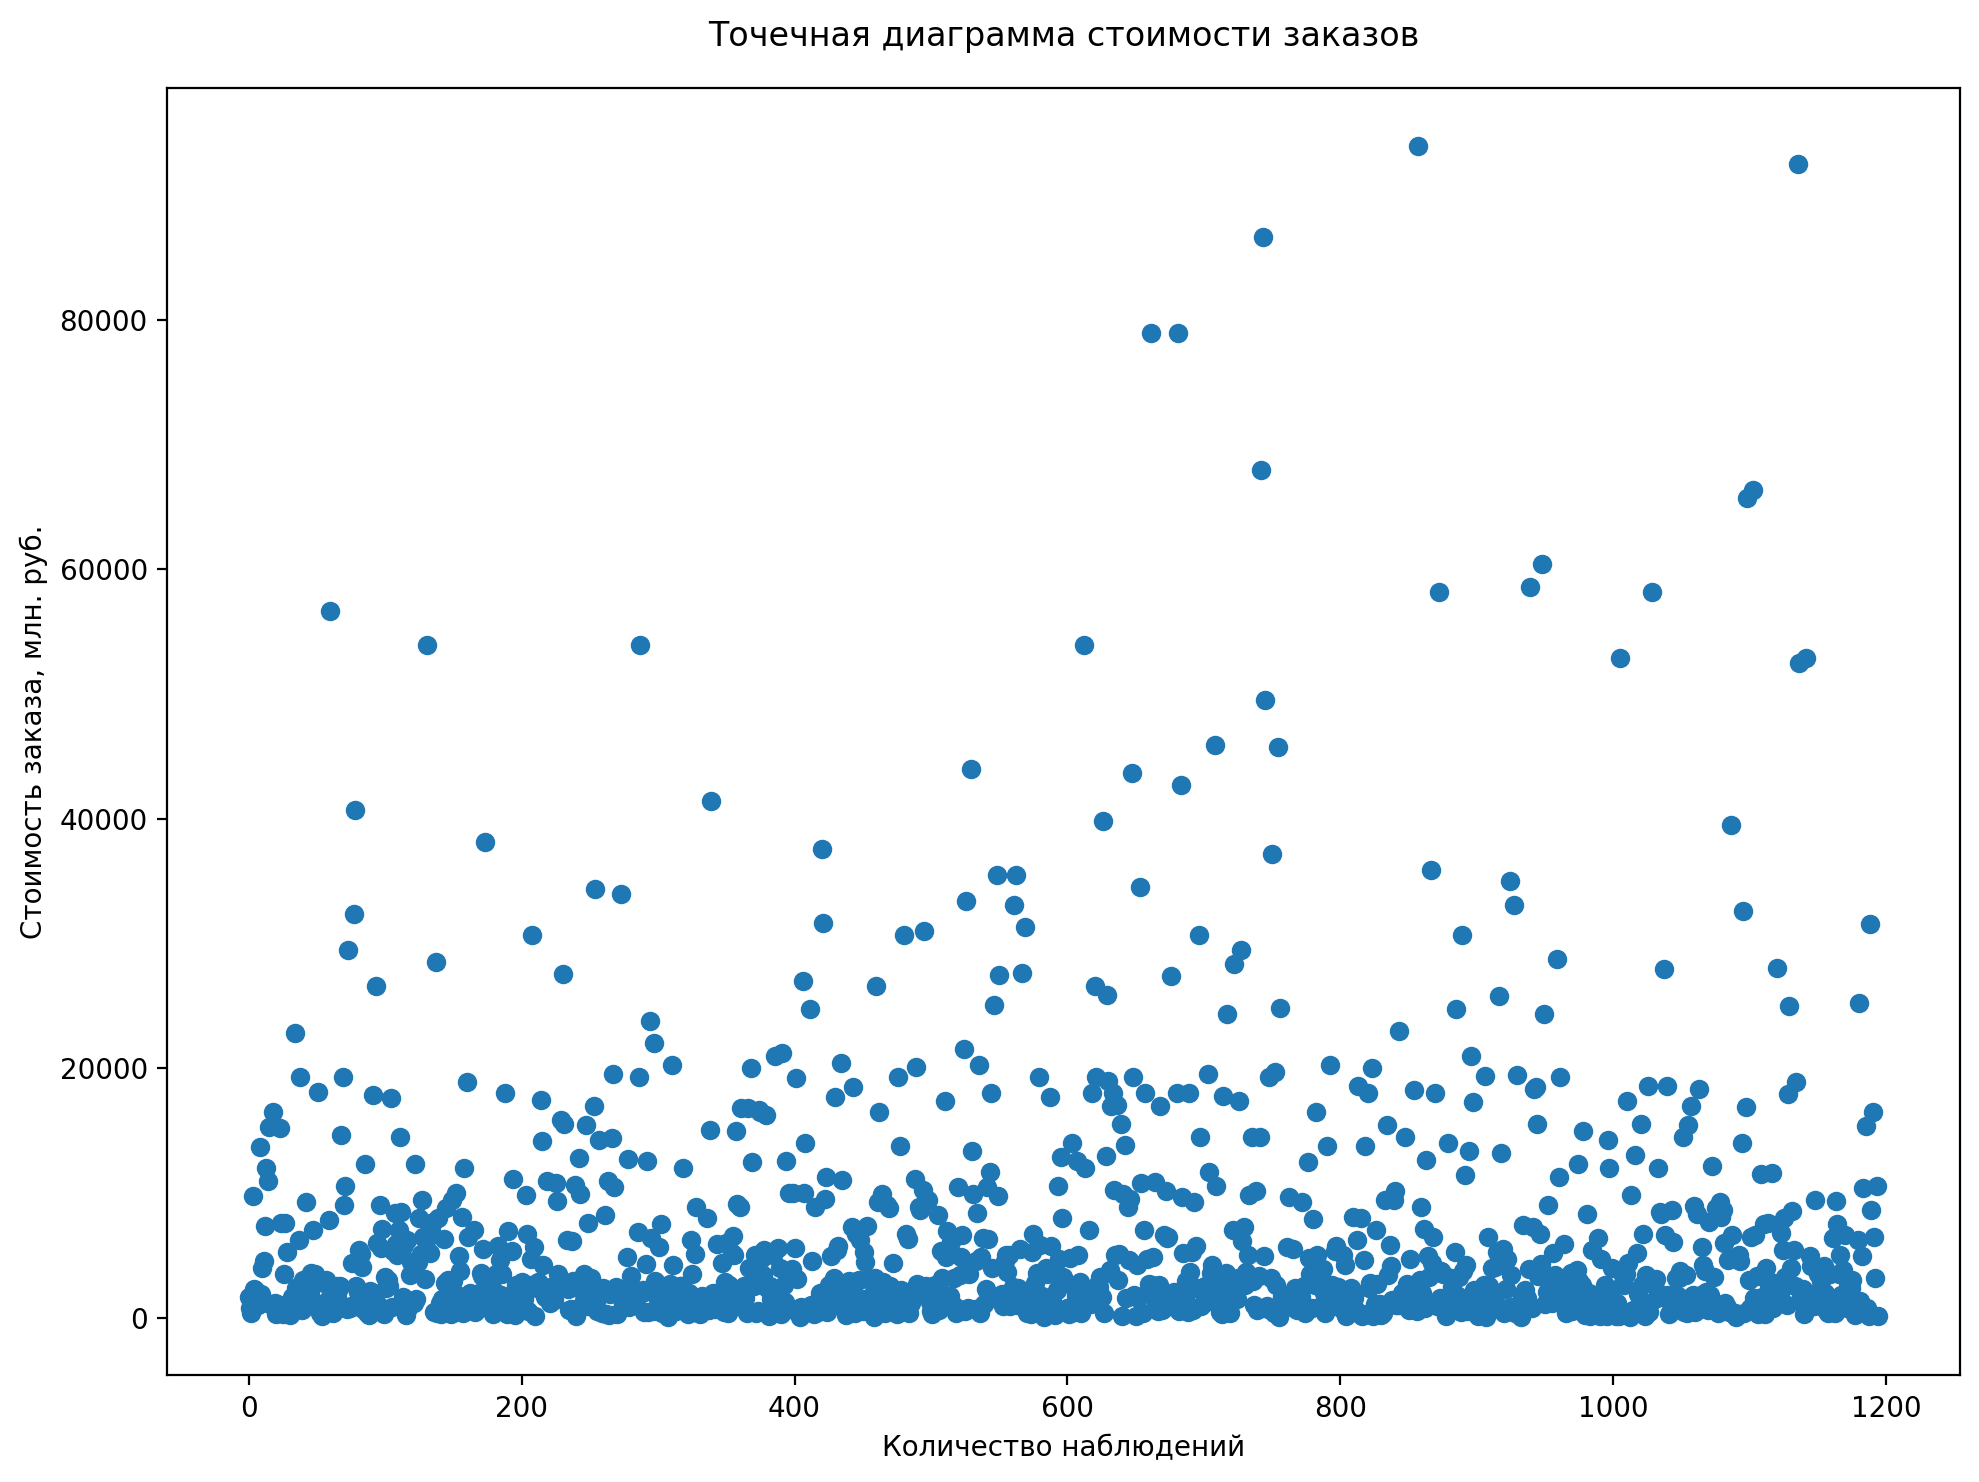

In [30]:
#построим график по выбранным границам (для большинства заказов)

abanomal_orders = orders.query('revenue < 100000')

#серия из чисел от 0 до количества наблюдений
x_values = pd.Series(range(0, len(abanomal_orders['revenue'])))

plt.scatter(x_values, abanomal_orders['revenue'])

plt.ylabel('Стоимость заказа, млн. руб.')
plt.xlabel('Количество наблюдений')
plt.title('Точечная диаграмма стоимости заказов', pad=15)
plt.tight_layout();

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. 

In [31]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:**

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей.

Примем за аномальных пользователей тех, кто совершил заказ на сумму свыше 30 000 рублей. Так мы уберем от 1% до 5% заказов с наибольшей стоимостью.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по данным без удаления аномальных пользователей. 

Сформулируем гипотезы:
* `Нулевая: различий в среднем количестве заказов между группами нет`
* `Альтернативная: различия в среднем между группами есть`


В связи с наличием больших (по сравнению с нормальным распределением) выбросов для проверки гипотез будем использовать **непараметрический тест Уилкоксона-Манна-Уитни.** Этот тест основывается на структурном (непараметрическом) подходе, не учитывает сами значения, а работает с рангами - номерами значений в упорядоченном ряду для каждой из двух выборок по порядку от меньшего к большему. После ранжирования сравниваются ранги одних и тех же значений, попавших в обе выборки. За счет работы с рангами, а не с самими значениями, сильные выбросы, попавшие в выборки не будут иметь влияние на результаты теста.

In [32]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [33]:
#найдем количество пользователей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#определим количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#найдем количество пользователей в выбранную дату в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#определим количество пользователей до выбранной даты включительно в группе В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


#определим количество заказов и суммарную выручку в выбранную дату в группе A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#найдем суммарное число заказов и суммарную выручку до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#определим количество заказов и суммарную выручку в выбранную дату в группе В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


#найдем суммарное число заказов и суммарную выручку до выбранной даты включительно в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#объединим данные в одну таблицу
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [34]:
#найдем пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов для группы А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

#найдем пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов для группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

#список с количеством заказов для каждого из пользователей группы А
#тем, кто ничего не заказал соответствуют нули
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#список с количеством заказов для каждого из пользователей группы В
#тем, кто ничего не заказал соответствуют нули
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#считаем статистическую значимость различия среднего количества заказов по результатам теста
#применяем тест Манна-Уитни
display('p-значение:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

#считаем относительное различие в среднем между группами
display('Относительный прирост cреднего количества заказов на посетителя группы B относительно группы A:', 
        "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


'p-значение:'

'0.017'

'Относительный прирост cреднего количества заказов на посетителя группы B относительно группы A:'

'0.138'

**Вывод:**

Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы отвергаем. Относительный прирост среднего группы B к конверсии группы А равен 13.8% — второе число в выводе.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

In [35]:
#считаем статистическую значимость различия средних чеков между группами
#применяем тест Манна-Уитни
display('p-значение:', '{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], 
    orders[orders['group']=='B']['revenue'])[1]))

#считаем относительный прирост среднего чека группы B
display('Относительный прирост среднего чека группы B к группе А:', '{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'p-значение:'

'0.729'

'Относительный прирост среднего чека группы B к группе А:'

'0.259'

**Вывод:**

P-value = 0.729 больше 0.05 - статистически значимых отличий в среднем чеке между группами нет. Относительное различие средних чеков между группами 25,9%.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Подготовим данные для расчета - очистим данные, т.е. избавимся от аномальных пользователейю. Напомним что за аномальных пользователей мы приняли тех пользователей, кто совершил 4 и более заказа или совершил заказ на сумму свыше 30 000 рублей.

In [36]:
#срез пользователей с числом заказов более 4-х
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitor_id'],
    ],
    axis=0,
)

#срез пользователей с аномальной суммой заказа
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']

#объединим всех аномальных пользователей
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormalUsers.head(5))
display('Количество аномальных пользователей:', abnormalUsers.shape[0])
display('Доля аномальных пользователей (%):', 
        round(abnormalUsers.shape[0] / orders['visitor_id'].nunique() * 100, 2))

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitor_id, dtype: int64

'Количество аномальных пользователей:'

59

'Доля аномальных пользователей (%):'

5.72

Всего 59 аномальных пользователей, что составляет около 6% от общего числа пользователей, участвовавших в эксперименте. Определим как их действия повлияли на результаты А/В-теста.

In [37]:
#список с количеством заказов для каждого из пользователей группы А, без учета аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#список с количеством заказов для каждого из пользователей группы В, без учета аномальных пользователей
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#считаем статистическую значимость различия среднего количества заказов по результатам теста
#применяем тест Манна-Уитни
display('p-значение:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

#считаем относительное различие в среднем между группами
display('Относительный прирост среднего числа заказов группы В к группе А:', 
        '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'p-значение:'

'0.018'

'Относительный прирост среднего числа заказов группы В к группе А:'

'0.145'

**Вывод:**

Результаты по среднему количеству заказов практически не изменились: p-value = 0.018 меньше 0.05, т.е. между группами есть статистически значимые различия. Относительный прирост среднего числа заказов группы В равен 14,5%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [38]:
#считаем статистическую значимость различия средних чеков между группами
#применяем тест Манна-Уитни
display('p-значение:', '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]))

#считаем относительный прирост среднего чека группы B
display('Относительный прирост среднего чека группы B к группе А:', "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1))


'p-значение:'

'0.961'

'Относительный прирост среднего чека группы B к группе А:'

'-0.014'

**Вывод:**

P-value = 0.961 больше 0.05 - статистически значимых отличий в среднем чеке между группами нет. Относительное различие средних чеков между группами сократилось и изменилось в 1,4% в пользу группы А.

###  Выводы А/В теста

Резюмируя результаты теста:

* Есть статистически значимое различие по среднему количеству заказов на пользователя между группами как по сырым данным, так и после фильтрации аномалий.
* По сырым данным нет статистически значимого различия по среднему чеку между группами. После удаления аномалий результат не изменился.
* График различия среднего количества заказов на пользователя между группами сообщает, что результаты группы B лучше группы A: значения зафиксировались около прироста в 10%.
* График различия среднего чека колеблется, что позволило нам найти аномалии. Сделать из этого графика определённые выводы нельзя.

Исходя из фактов выше принимаем решение:

**1. Остановить тест, зафиксировать победу группы В над группой А.**